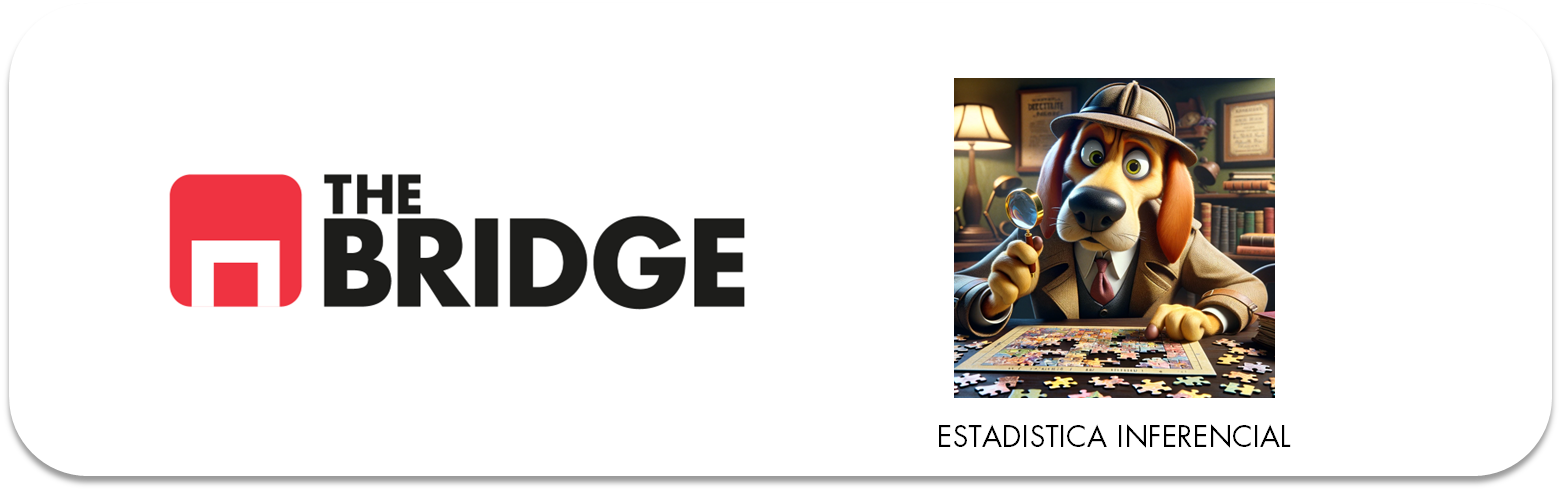

## INFERENCIAL (II): Media, intervalo de confianza y error estándar

Antes de empezar, carguemos nuestras librerías y los datasets que nos sirven de ejemplo:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_titanic = pd.read_csv("./data/titanic.csv")
df_life_satisfaction = pd.read_csv("./data/lifesat_full.csv")



La media de las variables de una muestra, en general, no coincidirá con la media de la población [aunque no es imposible, por ejemplo si consideramos el conjunto de coches con cuatro ruedas, la media de ruedas es constante e igual para cualquier muestra, pero salvo casos tan "simples" como este ejemplo en general no será el mismo valor]. Eso no quiere decir que no sea representativa o no nos sirva para estimar la media poblacional. Por ejemplo en el caso de la edad del Titanic y una muestra aleatoria:

In [ ]:
num_muestras_titanic = int(len(df_titanic) * 0.4)
muestra_titanic = df_titanic.sample(num_muestras_titanic, random_state = 42)
print(f"Media de edad de la muestra: {muestra_titanic['age'].mean()} años")
print(f"Muestra poblacion: {df_titanic['age'].mean()} años")
print(rf"Error muestral: {round(abs(muestra_titanic['age'].mean() - df_titanic['age'].mean()),2)}")

Si consideramos que ese "error muestral" es asumible, nuestra muestras será, en términos de edad, representativa de la media de edad poblacional.

Pero claro, no vamos a tener la media poblacional para calcular el error, y en caso de tenerla para que andarnos con muestras... Entonces, ¿qué hacemos?¿qué podemos decir de la edad media del pasaje del Titanic a partir de la edad media de nuestra muestra? 

Aquí es donde entra **el intervalo de confianza.**

### Intervalo de Confianza

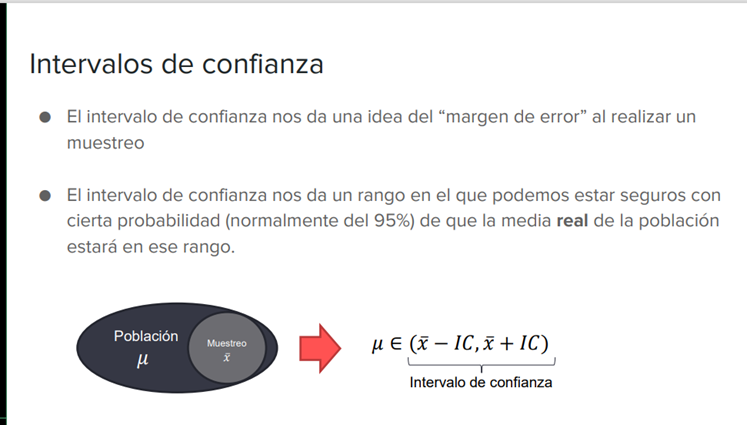

Es decir, ese margen asumible de error es el intervalo de confianza, que depende de la probabilidad que queramos tener de que la media poblacional esté en el intervalo indicado. En nuestro caso anterior un intervalo de confianza de un año, supondría que estamos seguros con una cierta pobrabilidad de que la media poblacional estará en el intervalo 29,31. 
  
De hecho como sabemos la media poblacional estamos al 100% seguros, pero ese no es el caso general. ¿Pero cómo se obtiene el IC y para qué probabilidades, o siempre es para el 95% como en la diapositiva?


Tranquilidad, tenemos una fórmula de cálculo que dependerá de esa probabilidad que nos deje tranquilos. Para eso tenemos que introducir el conceptor de **error estándar** y además un poquito de "fe".

### Error Estándar

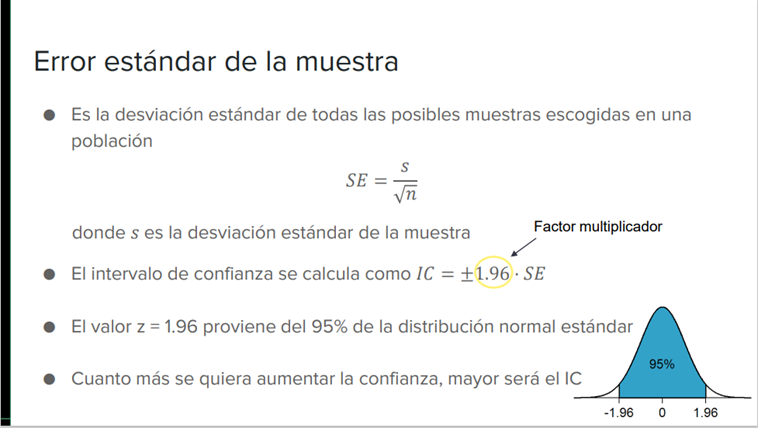

Recordemos que la desviación estándar es una medida de dispersión de las variables continuas que se obtiene con la siguiente fórmula (cuando es un estadístico de una muestra):

$$s = \sqrt{\frac{\sum\limits_{i=1}^n(x_i - \bar x)^2}{n-1}} $$

Obtengamos el IC (intervalo de confianza) de nuestra muestra del titanic para una probabilidad del 95%, con matices que veremos luego:

In [ ]:
from math import sqrt
s = muestra_titanic["age"].std()
SE = s/sqrt(len(muestra_titanic))
media_edad = round(muestra_titanic.age.mean(),2)
IC = round(1.96 * SE,2)
print("IC = ", IC)
print(f"Intervalo de confianza: [{media_edad -IC},{media_edad +IC}]")

Es decir, con una confianza del 95% podríamos decir que la media de edad poblacional del titanic está entre esos dos valores (que sabemos que es así, porque tenemos la población)

**El matiz**: Para poder usar este estadístico hemos supuesto que la distribución de la variable que queremos caracterízar sigue una figura específica de la que hemos hablado, la distribución normal o gaussiana.

Hasta aquí hemos visto como obtener el intervalo en el cuál podríamos situar la media poblacional a partir de la media de la muestra, pero la pregunta era si podíamos tener cierta confianza estadística de si la media de la muestra representa la media poblacional. 

En general, la media muestral estadísticamente hablando tiene probabilidad 0 de ser la media poblacional, siempre hablaremos de un intervalo de confianza, pero lo que podemos hacer es ajustar ese IC, en función de la probabilidad de estar seguros. 
En las siguientes sesiones veremos el mecanismo para cambiar el IC en función de la confianza estadística que queramos tener. Y el mismo mecanismo, nos permitirá también analizar si a partir de la media muestral podemos saber si la media poblacional estará por encima o por debajo de un umbral. Para ello utilizaremos contraste de hipótesis y test como los empleados durante el módulo de análisis de datos.